In [235]:
%matplotlib notebook

# # <pip install import-ipynb> Allows you to import other ipynb files to a new jupyter notebook
import import_ipynb
from main import data
import matplotlib.pyplot as plt
# Import other modules
import pandas as pd
from sklearn import preprocessing
import ast # Library for convert string representation of dict to a dict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import seaborn as sns


In [2]:
#read reviews.csv

df_reviews = []
chunksize = 10 ** 6
for chunk in pd.read_csv('/Users/mac/Downloads/Bootcamp/reviews.csv', chunksize=chunksize, low_memory=False):
    df_reviews.append(chunk)
    


In [3]:
#create reviewsdataframe
reviews_dataframe = pd.concat(df_reviews, ignore_index=True)

In [4]:
# Read the dataset
df = pd.read_csv('yelp_business.csv')
df1 = pd.read_csv('yelp_business.csv')
# Data Pre-processing / Cleaning Step
    # Remove unnecessary columns
clean_df = df.drop(columns=['address', 'business_id', 'city', 'hours', 'postal_code', 'review_count',
                            'stars', 'Standardized Stars'])
clean_df = clean_df.drop(clean_df.columns[0], axis=1)
df1 = df1.drop(df1.columns[0], axis=1)
    # Filter by Restaurants
clean_restaurants = clean_df[clean_df['categories'].str.contains("Restaurants") == True]
df1_clean_restaurants = df1[df1['categories'].str.contains("Restaurants") == True]

    # Filter by currently open restaurants
clean_restaurants = clean_restaurants[clean_restaurants['is_open'] == 1]
df1_clean_restaurants = df1_clean_restaurants[df1_clean_restaurants['is_open'] == 1]


    # Drop "is_open" column because does not have meaning after the filter
clean_restaurants = clean_restaurants.drop(columns=['is_open'])
df1_clean_restaurants = df1_clean_restaurants.drop(columns=['is_open'])
    
    # Organize order of columns
clean_restaurants = clean_restaurants[['name', 'attributes', 'categories', 'latitude', 'longitude', 'state', 'KPI']].reset_index()
df1_clean_restaurants = df1_clean_restaurants[['name', 'attributes', 'categories', 'latitude', 'longitude', 'state', 'KPI']].reset_index()
clean_restaurants = clean_restaurants.drop(columns=['index'])
df1_clean_restaurants = df1_clean_restaurants.drop(columns=['index'])
clean_restaurants['attributes'] = clean_restaurants['attributes'].dropna().apply(ast.literal_eval)
df1_clean_restaurants['attributes'] = df1_clean_restaurants['attributes'].dropna().apply(ast.literal_eval)
# clean_restaurants.attributes[0]

    # Splitting dict on 'attribute' column
attributes = clean_restaurants['attributes'].apply(pd.Series)
attributes_without_dropping = df1_clean_restaurants['attributes'].apply(pd.Series)


In [5]:
attributes_c = attributes

In [6]:

df1['name']=df1['name'].str.replace('"','')
df1['address']=df1['address'].str.replace('"','')

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
cleaned_df1 = df1.loc[df1['state'].isin(states)]
cleaned_df1['categories'] = cleaned_df1['categories'].fillna('EMPTY')
cleaned_df1.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,Standardized Stars,KPI
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,-0.575015,-0.345009
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ,1.388743,0.833246
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,0.406864,0.244119
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV,-0.084075,-0.050445


## Restaurants category

In [7]:

usa_restaurants = cleaned_df1.loc[cleaned_df1['categories'].str.contains('Restaurants')]
usa_restaurants['category'] = pd.Series()
usa_restaurants.loc[usa_restaurants['categories'].str.contains('American'),'category'] = 'American'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Mexican'), 'category'] = 'Mexican'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Italian'), 'category'] = 'Italian'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Japanese'), 'category'] = 'Japanese'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Chinese'), 'category'] = 'Chinese'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Thai'), 'category'] = 'Thai'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Mediterranean'), 'category'] = 'Mediterranean'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('French'), 'category'] = 'French'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Vietnamese'), 'category'] = 'Vietnamese'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Greek'),'category'] = 'Greek'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Indian'),'category'] = 'Indian'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Korean'),'category'] = 'Korean'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Hawaiian'),'category'] = 'Hawaiian'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('African'),'category'] = 'African'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Spanish'),'category'] = 'Spanish'
usa_restaurants.loc[usa_restaurants['categories'].str.contains('Middle_eastern'),'category'] = 'Middle_eastern'

usa_restaurants['category'][:20]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2      Japanese
11      Mexican
13      Italian
17      Italian
23          NaN
25      Mexican
35      Italian
58          NaN
66          NaN
73     Japanese
75          NaN
77     American
78      Chinese
111     Chinese
113    American
120    American
133         NaN
135     Italian
140    American
141        Thai
Name: category, dtype: object

In [8]:
usa_restaurants.shape

(35878, 17)

In [9]:
usa_restaurants_by_type_cuisine = usa_restaurants.dropna(axis=0, subset=['category'])
usa_restaurants_by_type_cuisine.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,Standardized Stars,KPI,category
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,-0.575015,-0.345009,Mexican
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,0.406864,0.244119,Italian
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,NaN,0,36.100016,-115.128528,Carluccio's Tivoli Gardens,89119,40,4.0,NV,0.406864,0.284805,Italian
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': ""{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,0.897804,0.718243,Mexican


In [10]:
#check nulls
usa_restaurants.isnull().sum()


address                 355
attributes             1040
business_id               0
categories                0
city                      0
hours                  8095
is_open                   0
latitude                  0
longitude                 0
name                      0
postal_code              50
review_count              0
stars                     0
state                     0
Standardized Stars        0
KPI                       0
category              14718
dtype: int64

In [11]:
#merge restaurants and reviews
restaurants_reviews = pd.merge(usa_restaurants, reviews_dataframe, on = 'business_id')
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

In [12]:
restaurant_cleaned_reviews = restaurants_reviews.drop(columns=['latitude','longitude','Unnamed: 0','is_open','review_id','date','user_id'])


In [13]:
restaurant_cleaned_reviews['labels'] = ''
restaurant_cleaned_reviews.loc[restaurant_cleaned_reviews.review_star >=4, 'labels'] = 'positive'
restaurant_cleaned_reviews.loc[restaurant_cleaned_reviews.review_star ==3, 'labels'] = 'neutral'
restaurant_cleaned_reviews.loc[restaurant_cleaned_reviews.review_star <3, 'labels'] = 'negative'

In [14]:
restaurant_cleaned_reviews.head()
restaurant_grouped = restaurant_cleaned_reviews.groupby('name')
restaurant_grouped.mean()

,address,attributes,business_id,categories,city,hours,name,postal_code,review_count,avg_star,state,Standardized Stars,KPI,category,cool,funny,review_star,text,useful,labels
0,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese,0,0.0,2.0,"Husband was craving Chicken Teriyaki & gyoza, ...",1.0,negative
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese,1,0.0,4.0,Went there Saturday noon they open at 12pm but...,0.0,positive
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese,0,0.0,2.0,Went to this restaurant on Saturday as I had a...,1.0,negative
3,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese,3,2.0,5.0,This place will always have a place in my stom...,4.0,positive
4,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,NC,0.406864,0.325491,Japanese,0,0.0,4.0,"Well first time I've really had ""authentic"" Ja...",0.0,positive


,review_count,avg_star,Standardized Stars,KPI,funny,review_star,useful
name,,,,,,,
#1 Fried Rice,44.000000,3.500000,-0.084075,-0.058853,0.434783,3.391304,1.086957
#1 Hawaiian Barbecue,33.793651,3.682540,0.095157,0.051756,0.761905,3.619048,1.047619
#1 Pho,8.000000,3.500000,-0.084075,-0.050445,0.250000,3.625000,0.875000
#1 Sushi,64.000000,4.000000,0.406864,0.284805,0.323077,4.184615,0.923077
#1Brothers Pizza,67.000000,3.000000,-0.575015,-0.402510,0.144928,3.086957,0.347826
.99 Cent Pizza Place,8.000000,4.000000,0.406864,0.244119,0.250000,4.125000,1.875000
1 Brother's Pizza,29.000000,3.000000,-0.575015,-0.345009,0.206897,3.137931,1.275862
1 Brothers Pizza,61.000000,4.000000,0.406864,0.284805,0.500000,3.843750,0.906250
1 Hawaiian Barbecue,126.000000,3.500000,-0.084075,-0.058853,0.229008,3.549618,0.580153


# Plotting

<Figure size 792x432 with 0 Axes>

Text(0.5, 0, 'Average Rating')

Text(0, 0.5, 'Count of restaurants')

Text(0.5, 1.0, 'Count of Restaurants against Ratings')

Text(0, 266.22, '261')

Text(1, 870.0600000000001, '853')

Text(2, 2245.02, '2201')

Text(3, 3814.8, '3740')

Text(4, 6376.02, '6251')

Text(5, 8583.3, '8415')

Text(6, 8952.54, '8777')

Text(7, 4485.96, '4398')

Text(8, 1001.64, '982')

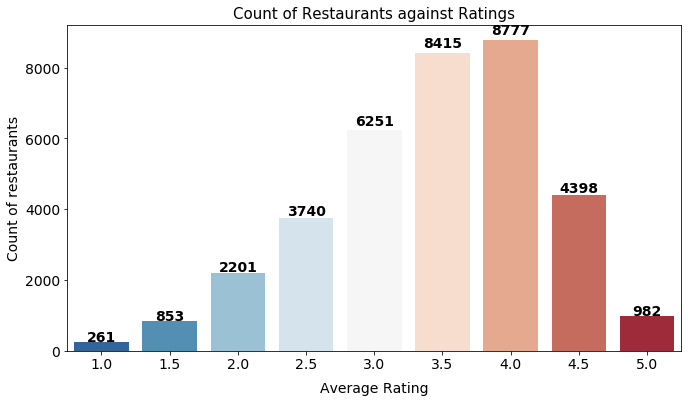

In [15]:
plt.figure(figsize=(11,6))
grouped = usa_restaurants.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Smoking

In [16]:
#create a list of columns to delete
delete_attributes_colums = ['HairSpecializesIn', 'AcceptsInsurance',
                            'BYOB', 'RestaurantsCounterService',
                            'Alcohol',                   'Ambience',
                      'BYOBCorkage',                 'BestNights',
                      'BikeParking',     'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards',            'BusinessParking',
                'ByAppointmentOnly',                     'Caters',
                        'CoatCheck',                    'Corkage',
              'DietaryRestrictions',                'DogsAllowed',
                        'DriveThru',             'GoodForDancing',
                      'GoodForKids',                'GoodForMeal',
                        'HappyHour',                      'HasTV',
                            'Music',                 'NoiseLevel',
                      'Open24Hours',             'OutdoorSeating',
                'RestaurantsAttire',        'RestaurantsDelivery',
         'RestaurantsGoodForGroups',     'RestaurantsPriceRange2',
          'RestaurantsReservations',    'RestaurantsTableService',
        'AgesAllowed', 'RestaurantsTakeOut', 'WheelchairAccessible',0,'WiFi']
#drop the columns
delete_cols = attributes_c.drop(delete_attributes_colums, axis=1, inplace=True)


In [17]:
#fill nas with number 2
#attributes_c = attributes_c.fillna(2)
#drop all NaN values in Smoking Column
attributes_c = attributes_c.dropna(axis=0, subset=['Smoking'])

#Add data['KPI'] values in attributes
attributes_c['KPI'] = data['KPI']


#smoking status above kpi average
non_smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'no\'')].count()
smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'yes\'')].count()
outdoor_smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'outdoor\'')].count()

#create df
rest_smoking_above_avg = pd.DataFrame({'Non-Smoker':non_smoking['Smoking'], 'Smoker':smoking['Smoking'], 'Outdoor':outdoor_smoking['Smoking']},index=[0])
rest_smoking_above_avg




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Non-Smoker,Smoker,Outdoor
0,586,55,330


Text(0.5, 1.0, 'How much influences smoking in a restaurant in ratings?')

Text(0.5, 0, 'Type of restaurants')

Text(0, 0.5, 'Restaurants above KPI average (0.015)')

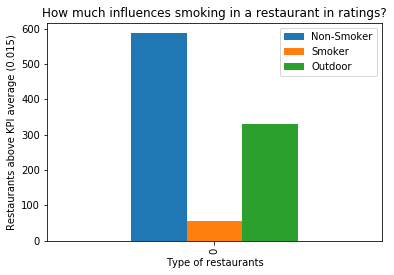

In [18]:
rest_smoking_above_avg.plot(kind='bar')
plt.title('How much influences smoking in a restaurant in ratings?')
plt.xlabel('Type of restaurants')
plt.ylabel('Restaurants above KPI average (0.015)')

# Bad Words

In [81]:
restaurant_cleaned_reviews.text = restaurant_cleaned_reviews.text.str.lower()

good_words = ['great','amazing','love','best','awesome','excellent','good',
                                                    'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']
bad_words = ['bad','disappointed','unfortunately','disappointing','horrible',
                                                     'lacking','terrible','sorry', 'disappoint']





In [89]:

#create empty colum and reset index
restaurant_cleaned_reviews['Review'] = ''
restaurant_cleaned_reviews.reset_index(drop=True).head()

,address,attributes,business_id,categories,city,hours,name,postal_code,review_count,avg_star,...,Standardized Stars,KPI,category,cool,funny,review_star,text,useful,labels,Review
0,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,2.0,"husband was craving chicken teriyaki & gyoza, ...",1.0,negative,
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,1,0.0,4.0,went there saturday noon they open at 12pm but...,0.0,positive,
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,2.0,went to this restaurant on saturday as i had a...,1.0,negative,
3,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,3,2.0,5.0,this place will always have a place in my stom...,4.0,positive,
4,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,4.0,"well first time i've really had ""authentic"" ja...",0.0,positive,


In [90]:
#double check if the reviews are accurate
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('great', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('amazing', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('love', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('best', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('awesome', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('excellent', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('loved', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('perfect', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'

restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('perfectly', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('happy', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('wonderful', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'

restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('enjoyed', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('nice', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('well', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'

restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('super', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('like', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('better', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'positive')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'P'


restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('bad', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('dissapointing', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('dissapointed', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('horrible', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('unfortunately', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('dissapoint', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('terrible', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'
restaurant_cleaned_reviews.loc[(restaurant_cleaned_reviews['text'].str.contains('sorry', na=False)) &\
                              ((restaurant_cleaned_reviews['labels'] == 'negative')\
                               | (restaurant_cleaned_reviews['labels'] == 'neutral')), 'Review'] = 'B'

#for word in restaurant_cleaned_reviews['text']:
#    if word in good_words:
#        restaurant_cleaned_reviews['Review'] = 'P'



In [186]:
v = restaurant_cleaned_reviews['category'].value_counts()

cuisine = pd.DataFrame(v)
cuisine

,category
American,995288
Mexican,351522
Italian,304993
Japanese,178602
Chinese,149485
Thai,91536
French,64792
Korean,61427
Greek,61348
Mediterranean,58713


In [151]:
american_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'American'))]
american_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'American'))]

mexican_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Mexican'))]
mexican_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Mexican'))]

italian_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Italian'))]
italian_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Italian'))]

japanese_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Japanese'))]
japanese_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Japanese'))]

chinese_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Chinese'))]
chinese_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Chinese'))]

thai_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Thai'))]
thai_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Thai'))]

french_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'French'))]
french_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'French'))]

korean_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Korean'))]
korean_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Korean'))]

greek_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Greek'))]
greek_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Greek'))]

mediterranean_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Mediterranean'))]
mediterranean_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Mediterranean'))]

vietnamese_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Vietnamese'))]
vietnamese_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Vietnamese'))]

indian_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Indian'))]
indian_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Indian'))]

hawaiian_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Hawaiian'))]
hawaiian_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Hawaiian'))]

spanish_good = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'Spanish'))]
spanish_bad = restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'Spanish'))]

african_good =  restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'P') & (restaurant_cleaned_reviews['category'] == 'African'))]
african_bad =  restaurant_cleaned_reviews.loc[((restaurant_cleaned_reviews['Review'] == 'B') & (restaurant_cleaned_reviews['category'] == 'African'))]

reviews_vs_cuisine = pd.DataFrame({'Positive Reviews':[american_good['Review'].count(), mexican_good['Review'].count(), italian_good['Review'].count(),\
                                                      japanese_good['Review'].count(), chinese_good['Review'].count(), thai_good['Review'].count(), french_good['Review'].count(),\
                                                      korean_good['Review'].count(), greek_good['Review'].count(), mediterranean_good['Review'].count(),\
                                                      vietnamese_good['Review'].count(), indian_good['Review'].count(), hawaiian_good['Review'].count(),\
                                                      spanish_good['Review'].count(), african_good['Review'].count()], \
                                   'Negative Reviews':[american_bad['Review'].count(), mexican_bad['Review'].count(), italian_bad['Review'].count(),\
                                                      japanese_bad['Review'].count(), chinese_bad['Review'].count(), thai_bad['Review'].count(), french_bad['Review'].count(),\
                                                      korean_bad['Review'].count(), greek_bad['Review'].count(), mediterranean_bad['Review'].count(),\
                                                      vietnamese_bad['Review'].count(), indian_bad['Review'].count(), hawaiian_bad['Review'].count(),\
                                                      spanish_bad['Review'].count(), african_bad['Review'].count()]}, index=cuisine.index)


<IPython.core.display.Javascript object>


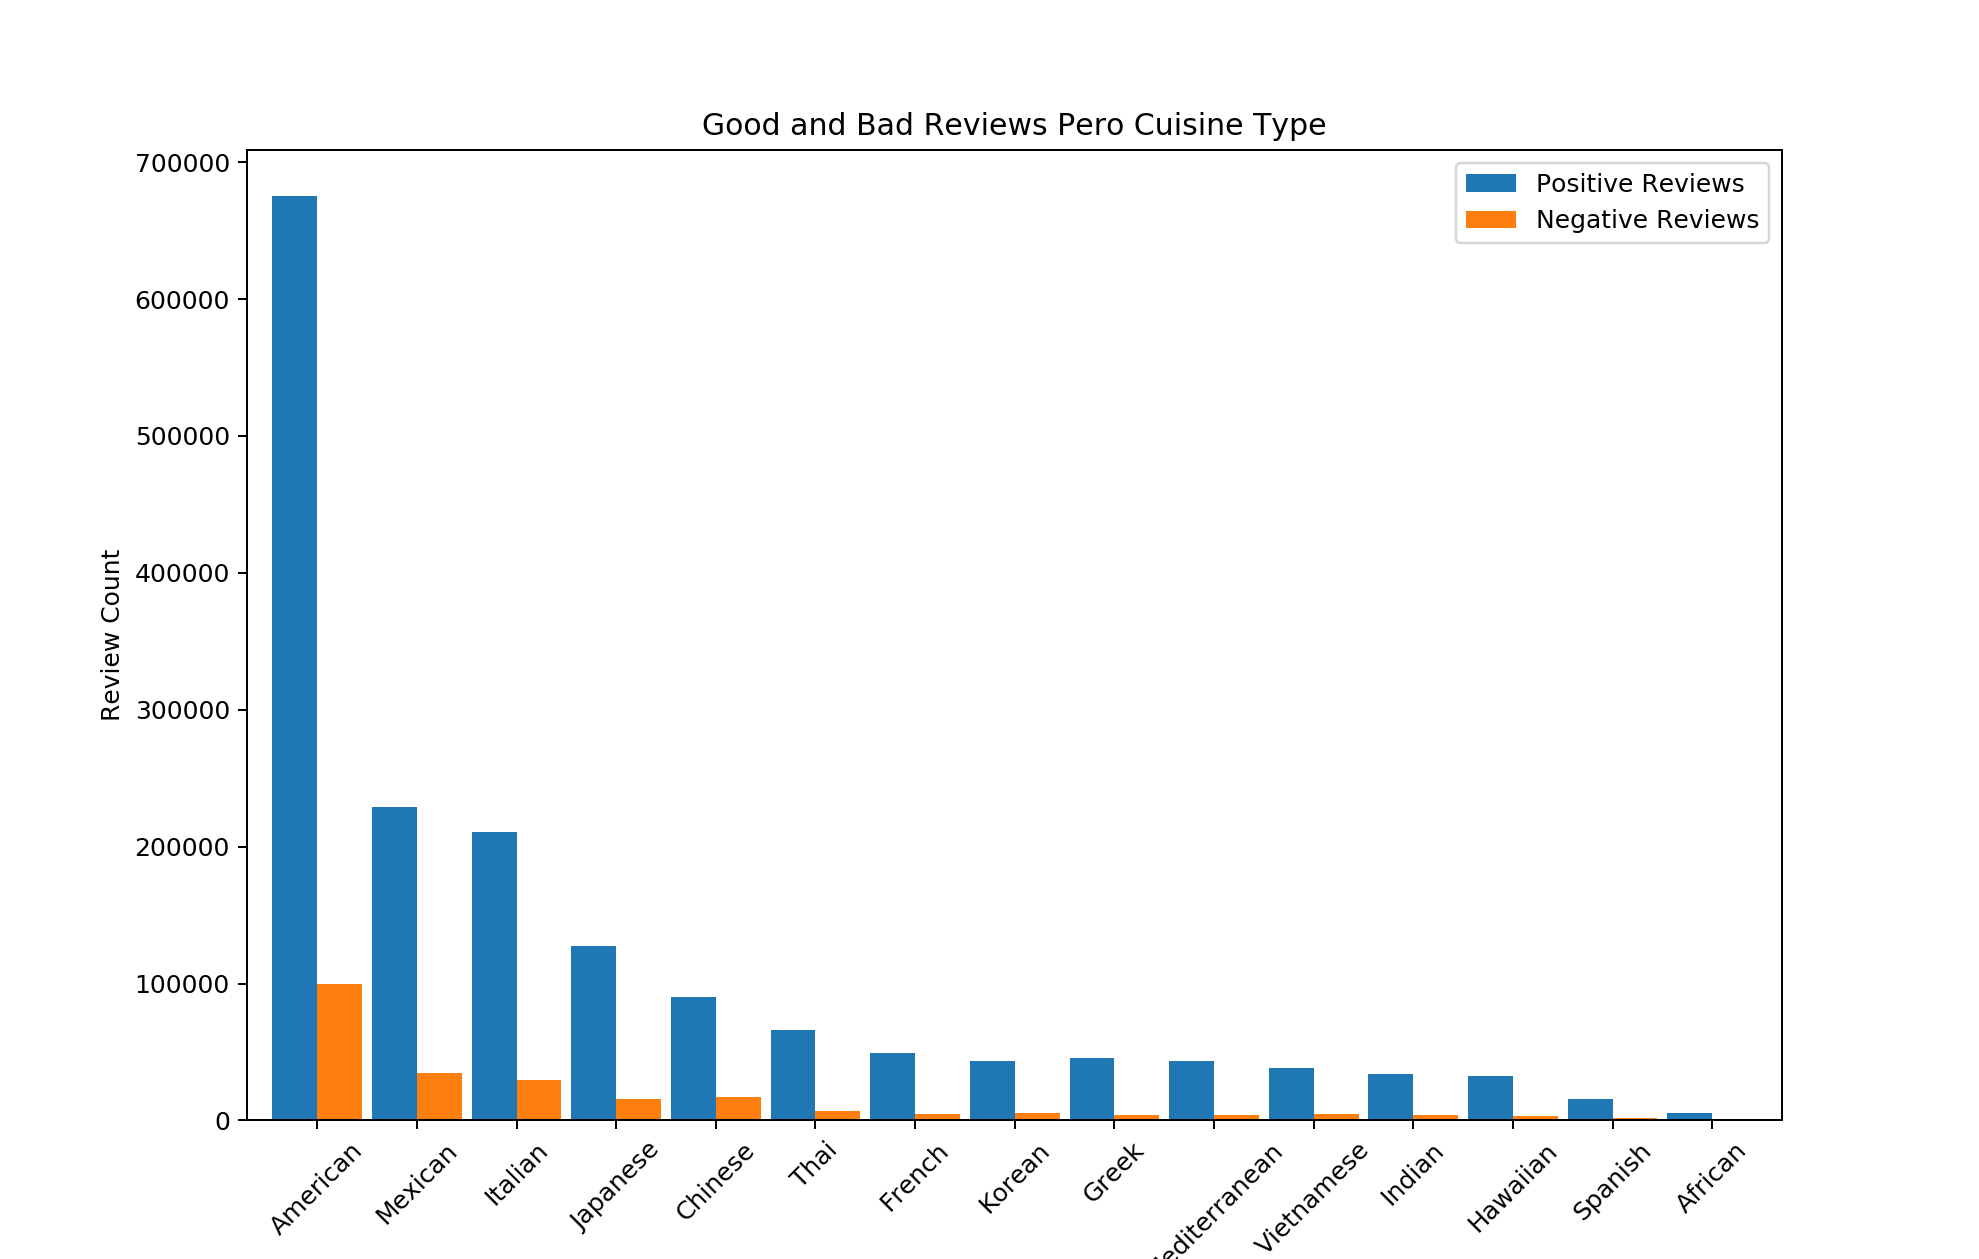

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

([<matplotlib.axis.XTick at 0x1cd60cf400>,
 <a list of 15 Text xticklabel objects>)

Text(0.5, 1.0, 'Good and Bad Reviews Pero Cuisine Type')

Text(0.5, 0, 'Cuisine Type')

Text(0, 0.5, 'Review Count')

In [236]:

cuisine_good_rv = reviews_vs_cuisine['Positive Reviews'].sort_values(ascending=False)
cuisine_bad_rv = reviews_vs_cuisine['Negative Reviews'].sort_values(ascending=False)


reviews_vs_cuisine.plot(kind='bar', figsize=(11,7), width=0.9, align='center')
plt.xticks(rotation=45)
cuisine_type = [x for x in cuisine.index]
plt.xticks(np.arange(len(cuisine_type)), cuisine_type)
plt.title('Good and Bad Reviews Pero Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Review Count')

<Figure size 792x504 with 0 Axes>

Text(0.5, 0, 'Number of restaurants')

Text(0, 0.5, 'Category')

Text(0.5, 1.0, 'Count of Restaurants by Category')

Text(8107, 0.15, '8107')

Text(3848, 1.15, '3848')

Text(2714, 2.15, '2714')

Text(2004, 3.15, '2004')

Text(951, 4.15, '951')

Text(600, 5.15, '600')

Text(579, 6.15, '579')

Text(536, 7.15, '536')

Text(441, 8.15, '441')

Text(364, 9.15, '364')

Text(320, 10.15, '320')

Text(292, 11.15, '292')

Text(239, 12.15, '239')

Text(110, 13.15, '110')

Text(55, 14.15, '55')

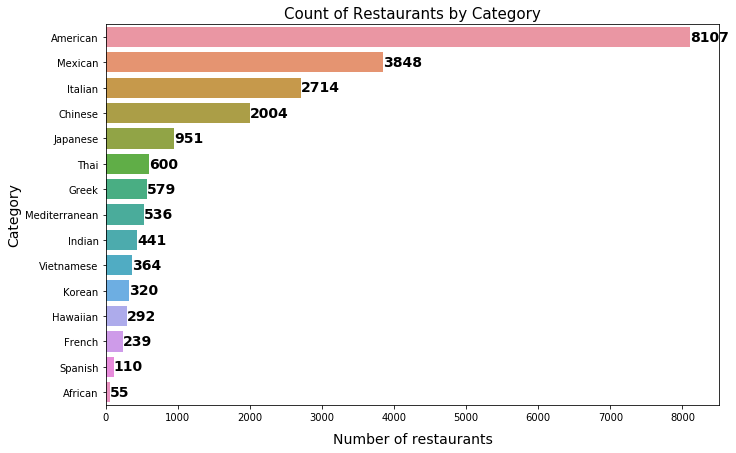

In [209]:
plt.figure(figsize=(11,7))
cuisine_type_grouped = usa_restaurants.category.value_counts()
sns.countplot(y='category',data=usa_restaurants, 
              order = cuisine_type_grouped.index)
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
for  i, v in enumerate(usa_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)


In [93]:
restaurant_cleaned_reviews

,address,attributes,business_id,categories,city,hours,name,postal_code,review_count,avg_star,...,Standardized Stars,KPI,category,cool,funny,review_star,text,useful,labels,Review
0,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,2.0,"husband was craving chicken teriyaki & gyoza, ...",1.0,negative,
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,1,0.0,4.0,went there saturday noon they open at 12pm but...,0.0,positive,P
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,2.0,went to this restaurant on saturday as i had a...,1.0,negative,B
3,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,3,2.0,5.0,this place will always have a place in my stom...,4.0,positive,P
4,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,4.0,"well first time i've really had ""authentic"" ja...",0.0,positive,P
5,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,2,0.0,5.0,i just came back from living in japan for two ...,11.0,positive,P
6,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,5.0,first of all it must be said that this is a ja...,4.0,positive,P
7,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,5.0,located in a small plaza is an authentic japan...,0.0,positive,P
8,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,0.0,3.0,waiting for my tekkadon i ate my miso soup but...,0.0,neutral,P
9,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",Musashi Japanese Restaurant,28210,170,4.0,...,0.406864,0.325491,Japanese,0,1.0,5.0,tonkatsu ramen!!!\nitadakimas!!\n\nthis place ...,3.0,positive,P


In [185]:
restaurant_cleaned_reviews.Review.value_counts()

P    2318653
      782387
B     324361
Name: Review, dtype: int64